In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from csv import reader
import seaborn as sn

In [2]:
def returnlabel(str):
    ret=[]
    with open(str, 'r') as read_obj:
        csv_reader = reader(read_obj)
        for row in csv_reader:
            row[0]=int(row[0])
            ret.append(row[0])
    return ret

In [4]:
x_train = pd.read_csv("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv",header=None).to_numpy()
x_test = pd.read_csv("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test=returnlabel("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv")
y_test=np.array(y_test)
y_train =returnlabel("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTrainLabel.csv")
y_train=np.array(y_train)
print("x_train.shape =", x_train.shape, 
      "\ny_train.shape =", y_train.shape, 
      "\nx_test.shape =", x_test.shape, 
      "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440,) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360,)


(13440, 32, 32, 1) (3360, 32, 32, 1)


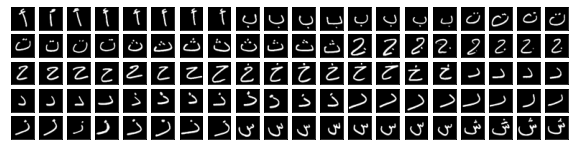

In [5]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_test.shape)
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(20,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(32,32).T,"gray")
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train[0].shape),
    tf.keras.layers.Dense(1024, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train,epochs=50,batch_size=64)

Epoch 1/50
210/210 [==============================] - 3s 16ms/step - loss: 2.5382 - accuracy: 0.2188
Epoch 2/50
210/210 [==============================] - 3s 15ms/step - loss: 1.5364 - accuracy: 0.4654
Epoch 3/50
210/210 [==============================] - 3s 16ms/step - loss: 1.1116 - accuracy: 0.5975
Epoch 4/50
210/210 [==============================] - 3s 15ms/step - loss: 0.8666 - accuracy: 0.6807
Epoch 5/50
210/210 [==============================] - 3s 13ms/step - loss: 0.7329 - accuracy: 0.7344
Epoch 6/50
210/210 [==============================] - 3s 15ms/step - loss: 0.5990 - accuracy: 0.7816
Epoch 7/50
210/210 [==============================] - 3s 12ms/step - loss: 0.5136 - accuracy: 0.8125
Epoch 8/50
210/210 [==============================] - 3s 13ms/step - loss: 0.4382 - accuracy: 0.8408
Epoch 9/50
210/210 [==============================] - 3s 12ms/step - loss: 0.4001 - accuracy: 0.8562
Epoch 10/50
210/210 [==============================] - 2s 12ms/step - loss: 0.3424 - accura

In [26]:
print(model.evaluate(x_test, y_test))
y_predict=model.predict(x_test)
Y_predict=[]
for i in y_predict:
    mx=np.max(i)
    idx=-1
    for j in i:
        idx=idx+1
        if(mx==j):
            break
    Y_predict.append(idx)

105/105 [==============================] - 1s 6ms/step - loss: 1.1140 - accuracy: 0.8018
[1.1140085458755493, 0.8017857074737549]


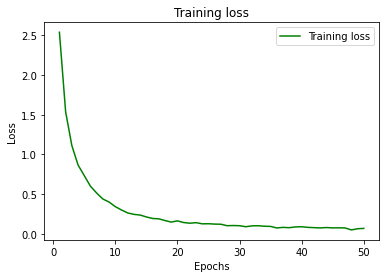

In [22]:
loss_train = r.history['loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

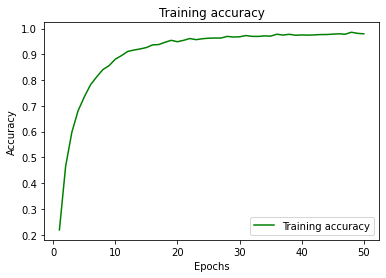

In [23]:
accuray_train = r.history['accuracy']
epochs = range(1,51)
plt.plot(epochs, accuray_train, 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

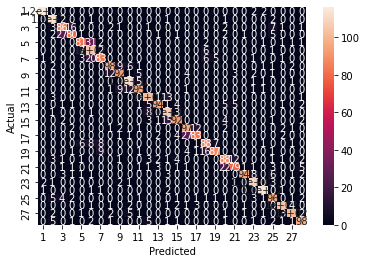

In [25]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(Y_predict,name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sn.heatmap(df_confusion, annot=True)
plt.show()
#pint(df_confusion)